<a href="https://colab.research.google.com/github/vegansam/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture4/Submissions/SamGood_09182024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Wavetronix.csv')
df.head()



,day,Time,WAVE-NE-Count,WAVE-NE-Speed,WAVE-SW-Count,WAVE-SW-Speed,Month,Year
0,1,2022-07-10 00:00:00,NaN,NaN,3.0,59.5,10,2021
1,1,2022-07-10 00:01:00,10.0,62.0,2.0,59.0,10,2021
2,1,2022-07-10 00:02:00,5.0,63.6,4.0,58.4,10,2021
3,1,2022-07-10 00:03:00,11.0,58.2,9.0,60.0,10,2021
4,1,2022-07-10 00:04:00,19.0,60.2,17.0,61.2,10,2021


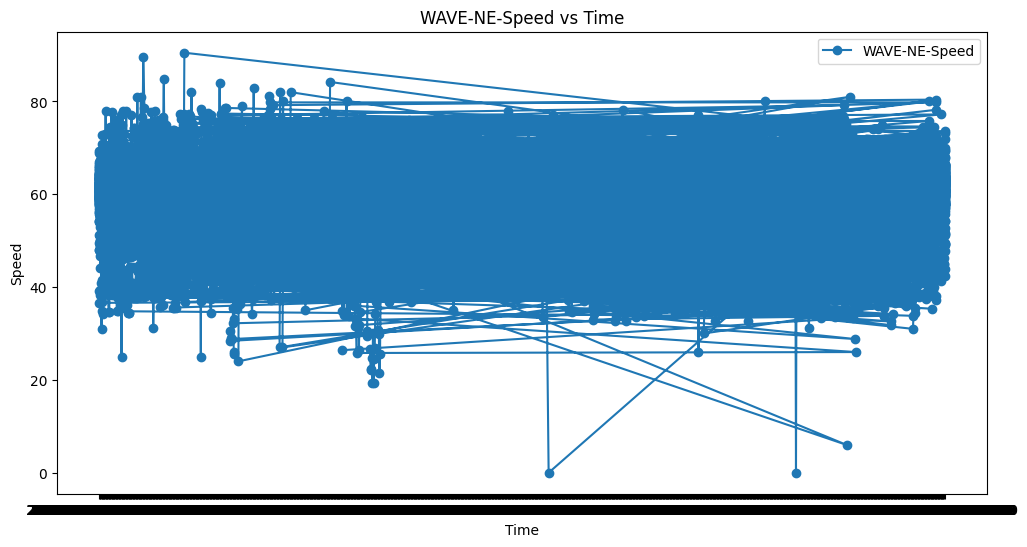

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['WAVE-NE-Speed'], 'o-', label='WAVE-NE-Speed')
plt.xlabel('Time')

plt.ylabel('Speed')
plt.title('WAVE-NE-Speed vs Time')
plt.legend()
plt.show()

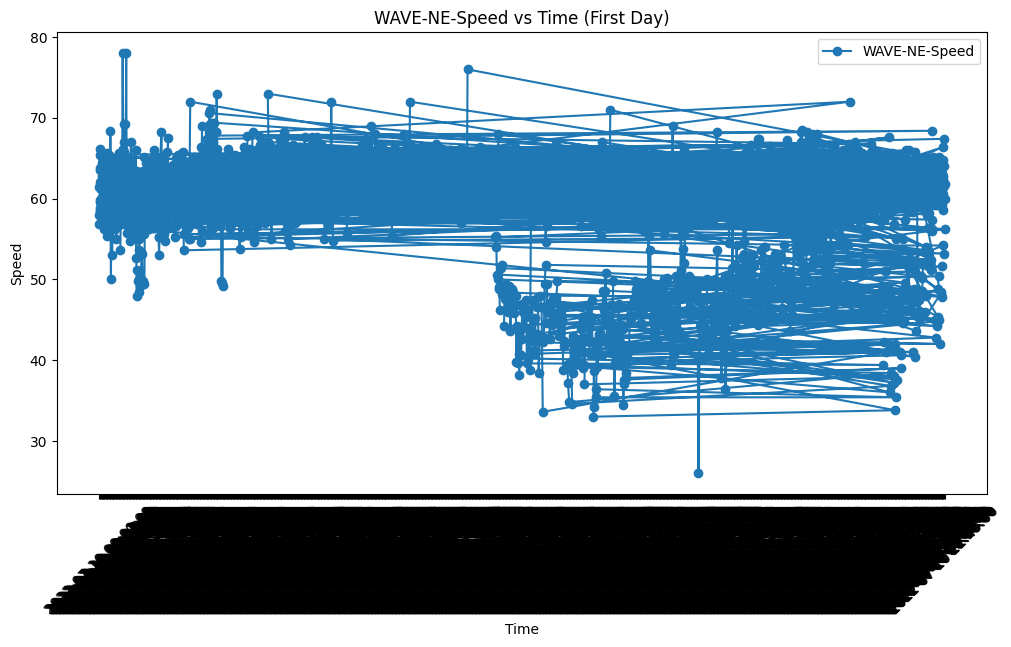

In [14]:
first_day_data = df[df['day'] == 1]

# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.plot(first_day_data['Time'], first_day_data['WAVE-NE-Speed'], 'o-', label='WAVE-NE-Speed')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('WAVE-NE-Speed vs Time (First Day)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

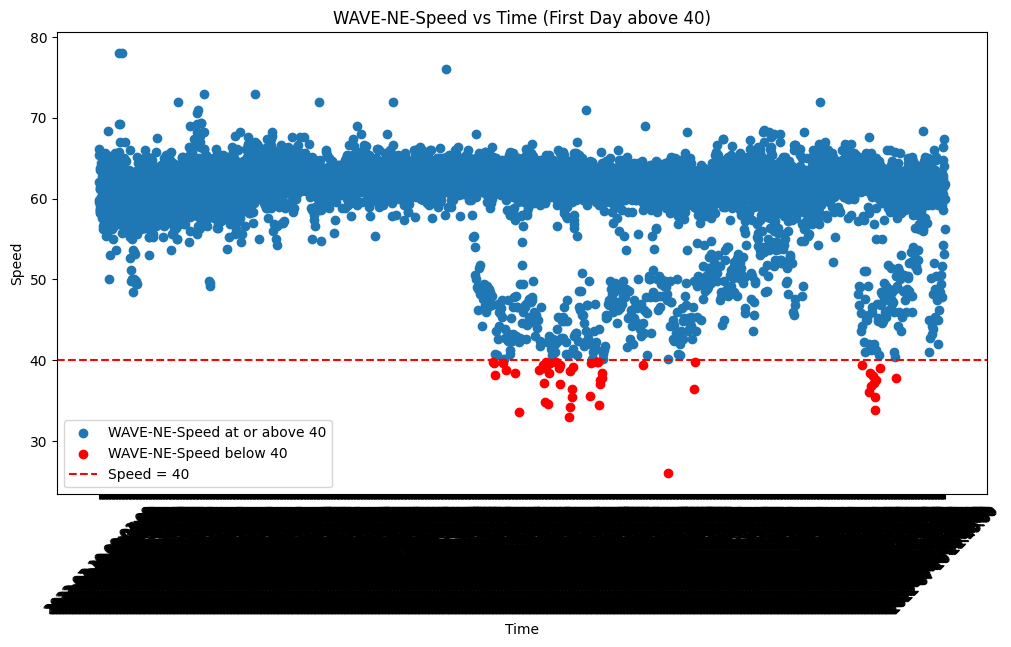

In [25]:
first_day_data = df[df['day'] == 1].reset_index(drop=True)

# Filter the data based on the speed limit
speed_limit_data = first_day_data[first_day_data['WAVE-NE-Speed'] >= 40]
speed_limit_data2 = first_day_data[first_day_data['WAVE-NE-Speed'] < 40]
# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.scatter(speed_limit_data['Time'], speed_limit_data['WAVE-NE-Speed'], label='WAVE-NE-Speed at or above 40')
plt.scatter(speed_limit_data2['Time'], speed_limit_data2['WAVE-NE-Speed'], label='WAVE-NE-Speed below 40', color='red')
plt.axhline(y=40, color='r', linestyle='--', label='Speed = 40')  # Add horizontal line
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('WAVE-NE-Speed vs Time (First Day above 40)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

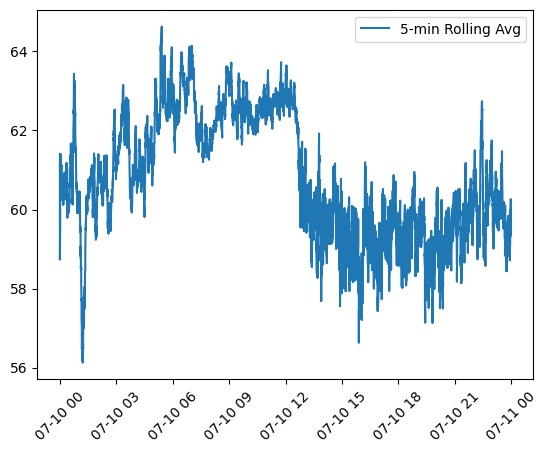

In [36]:
first_day_data = df[df['day'] == 1].reset_index(drop=True)
#first_day_data.head()

first_day_data['Time'] = pd.to_datetime(first_day_data['Time'])
first_day_data = first_day_data.sort_values('Time')
first_day_data.head()

# Set 'Time' as the DataFrame index
first_day_data.set_index('Time', inplace=True)

# Calculate the 5-minute rolling average for 'WAVE-NE-Speed'
first_day_data['5min_rolling_avg'] = first_day_data['WAVE-NE-Speed'].rolling('5T').mean()

# Plot the smoothed data
plt.plot(first_day_data.index, first_day_data['5min_rolling_avg'], label='5-min Rolling Avg')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [37]:
# Check for missing data in 'WAVE-NE-Speed'
missing_data = first_day_data['WAVE-NE-Speed'].isnull().sum()
print(f"Missing values in 'WAVE-NE-Speed': {missing_data}")

# Fill missing values in 'WAVE-NE-Speed' with the average of the column
avg_speed = first_day_data['WAVE-NE-Speed'].mean()
first_day_data['WAVE-NE-Speed'].fillna(avg_speed, inplace=True)

# Remove duplicate rows
first_day_data = first_day_data.drop_duplicates()

# Remove rows where 'WAVE-NE-Speed' is below 40 or above 75
first_day_data = first_day_data[(first_day_data['WAVE-NE-Speed'] >= 40) & (first_day_data['WAVE-NE-Speed'] <= 75)]

# Check the resulting DataFrame
print(first_day_data.head())


Missing values in 'WAVE-NE-Speed': 270
                     day  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
Time                                                                    
2022-07-10 00:00:00    1            NaN      60.809461            3.0   
2022-07-10 00:00:00    1            7.0      61.400000            8.0   
2022-07-10 00:00:00    1            8.0      58.000000           10.0   
2022-07-10 00:00:00    1           11.0      56.800000            2.0   
2022-07-10 00:01:00    1           10.0      62.000000            2.0   

                     WAVE-SW-Speed  Month  Year  5min_rolling_avg  
Time                                                               
2022-07-10 00:00:00           59.5     10  2021               NaN  
2022-07-10 00:00:00           63.6      3  2022         61.400000  
2022-07-10 00:00:00           62.0     12  2021         59.700000  
2022-07-10 00:00:00           60.2      2  2022         58.733333  
2022-07-10 00:01:00           59.0     10

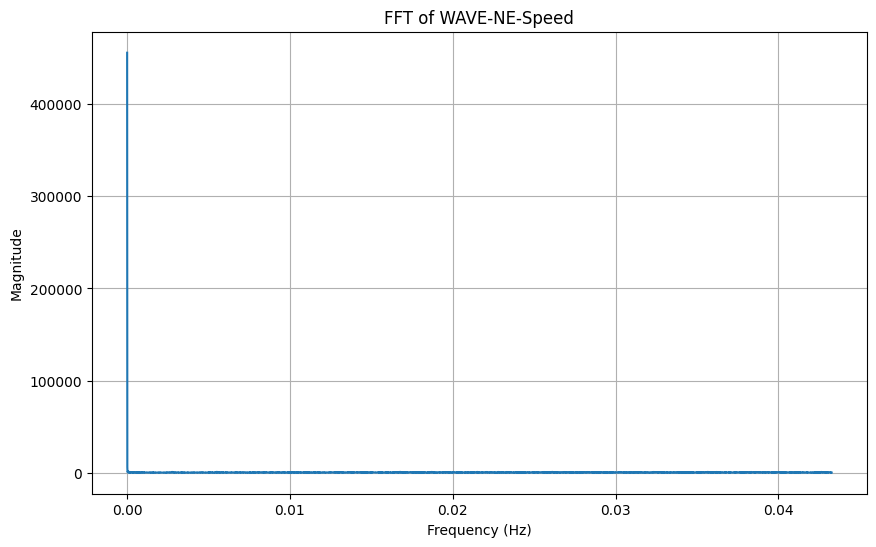

In [39]:
import numpy as np
first_day_data['Seconds'] = (first_day_data.index - first_day_data.index[0]).total_seconds()

# Apply FFT to 'WAVE-NE-Speed'
fft_result = np.fft.fft(first_day_data['WAVE-NE-Speed'])

# Calculate the corresponding frequencies
n = len(fft_result)  # Number of samples
sample_spacing = first_day_data['Seconds'].diff().mean()  # Time step between samples (in seconds)
frequencies = np.fft.fftfreq(n, sample_spacing)

# Plot the magnitude of the FFT (only positive frequencies)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n//2], np.abs(fft_result)[:n//2])  # Plot only positive frequencies
plt.title('FFT of WAVE-NE-Speed')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

<ipython-input-41-7ad1abd2a0d7>:14: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = signal.cwt(wave_ne_speed, signal.ricker, widths)


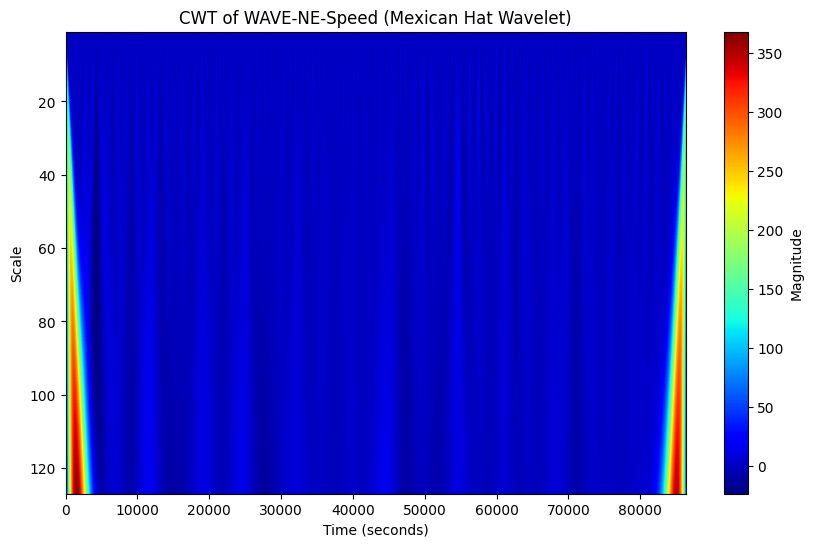

In [41]:
from scipy import signal

# Convert Time to seconds (assuming 'Time' is the index and it's datetime)
first_day_data['Seconds'] = (first_day_data.index - first_day_data.index[0]).total_seconds()

# Extract the 'WAVE-NE-Speed' values and the corresponding time in seconds
wave_ne_speed = first_day_data['WAVE-NE-Speed'].values
time_seconds = first_day_data['Seconds'].values

# Define the scales for the wavelet transform
widths = np.arange(1, 128)

# Apply Continuous Wavelet Transform using the 'mexh' wavelet (Mexican Hat)
cwt_matrix = signal.cwt(wave_ne_speed, signal.ricker, widths)

# Plot the CWT scalogram
plt.figure(figsize=(10, 6))
plt.imshow(cwt_matrix, extent=[time_seconds[0], time_seconds[-1], widths[-1], widths[0]], aspect='auto', cmap='jet')
plt.title('CWT of WAVE-NE-Speed (Mexican Hat Wavelet)')
plt.xlabel('Time (seconds)')
plt.ylabel('Scale')
plt.colorbar(label='Magnitude')
plt.show()


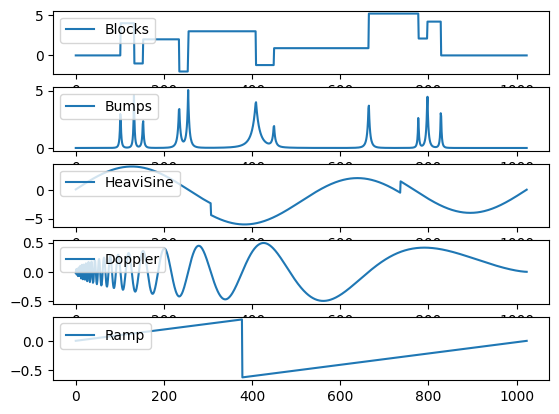

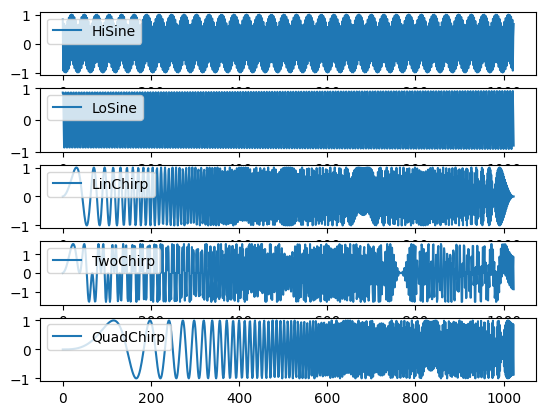

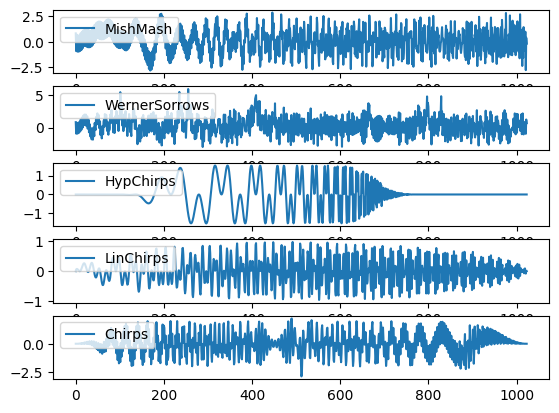

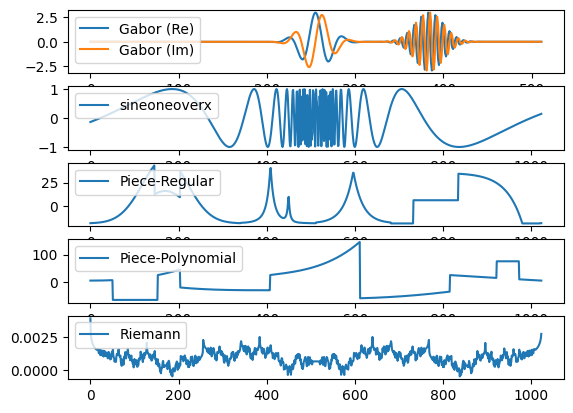

In [49]:
#!/usr/bin/env python

"""Plot the  set of 1D demo signals available in `pywt.data.demo_signal`."""

import matplotlib.pyplot as plt
import numpy as np

import pywt

# use 'list' to get a list of all available 1d demo signals
signals = pywt.data.demo_signal('list')

subplots_per_fig = 5
signal_length = 1024
i_fig = 0
n_figures = int(np.ceil(len(signals)/subplots_per_fig))
for i_fig in range(n_figures):
    # Select a subset of functions for the current plot
    func_subset = signals[
        i_fig * subplots_per_fig:(i_fig + 1) * subplots_per_fig]

    # create a figure to hold this subset of the functions
    fig, axes = plt.subplots(subplots_per_fig, 1)
    axes = axes.ravel()
    for n, signal in enumerate(func_subset):
        if signal in ['Gabor', 'sineoneoverx']:
            # user cannot specify a length for these two
            x = pywt.data.demo_signal(signal)
        else:
            x = pywt.data.demo_signal(signal, signal_length)
        ax = axes[n]
        ax.plot(x.real)
        if signal == 'Gabor':
            # The Gabor signal is complex-valued
            ax.plot(x.imag)
            ax.legend(['Gabor (Re)', 'Gabor (Im)'], loc='upper left')
        else:
            ax.legend([signal, ], loc='upper left')
    # omit axes for any unused subplots
    for n in range(n + 1, len(axes)):
        axes[n].set_axis_off()
plt.show()

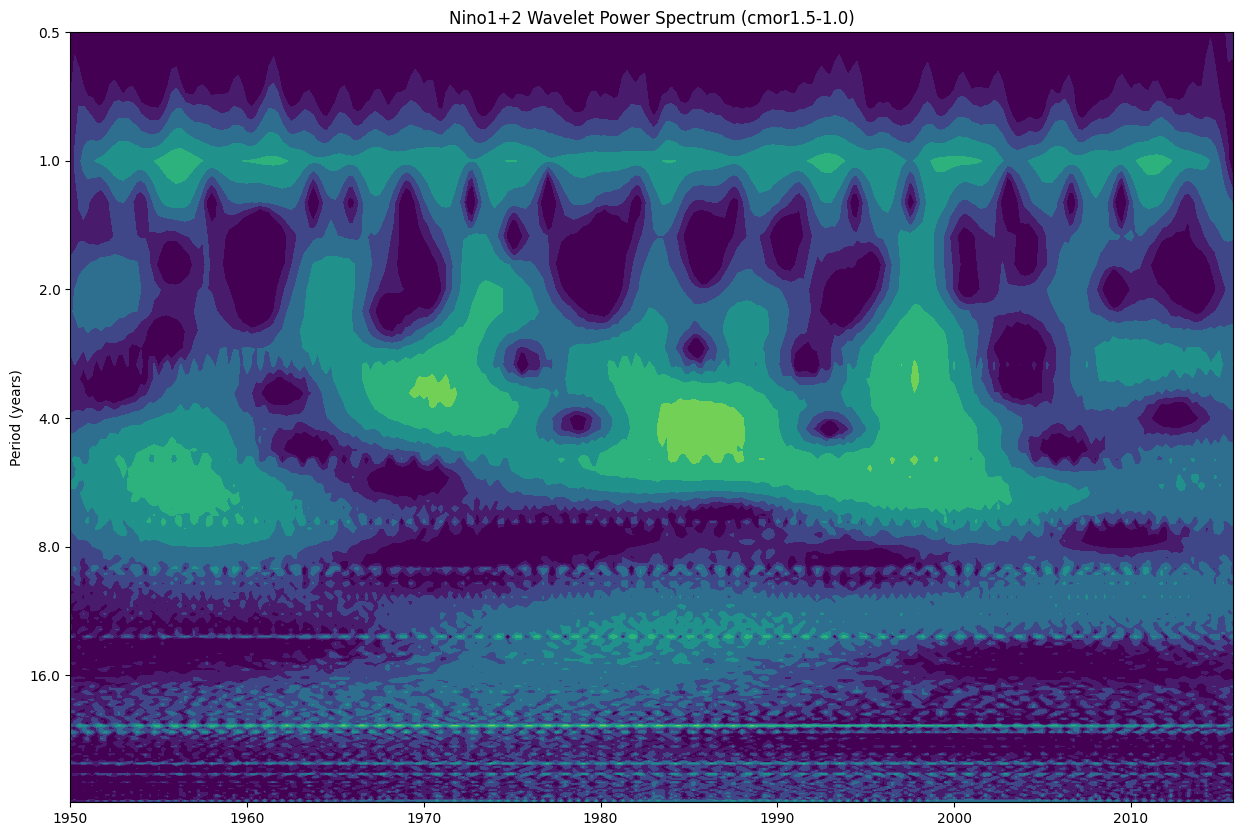

In [50]:
#!/usr/bin/env python

import matplotlib.pyplot as plt
import numpy as np

import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title(f'Nino1+2 Wavelet Power Spectrum ({wavelet})')
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()

In [42]:
!pip install requests Pillow PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.4 MB/s eta 0:00:00


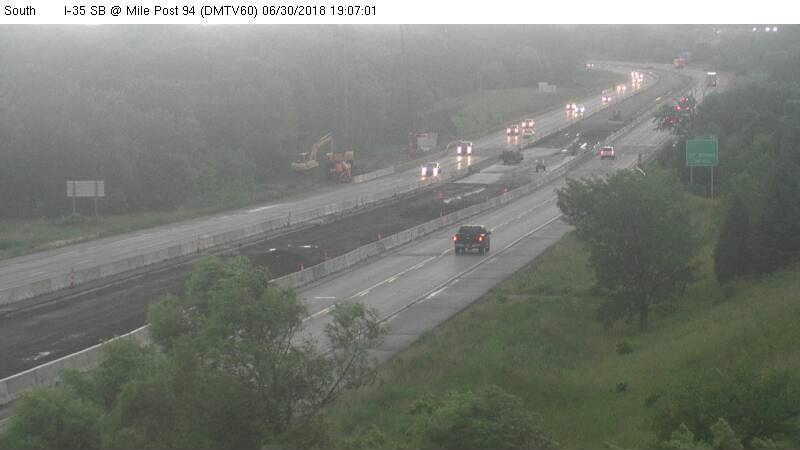

In [45]:
from PIL import Image
image = Image.open('/content/drive/MyDrive/2018-06-30-19-05.jpg')
display(image)

In [52]:
image_array = np.array(image)

Image array shape: (450, 800, 3)


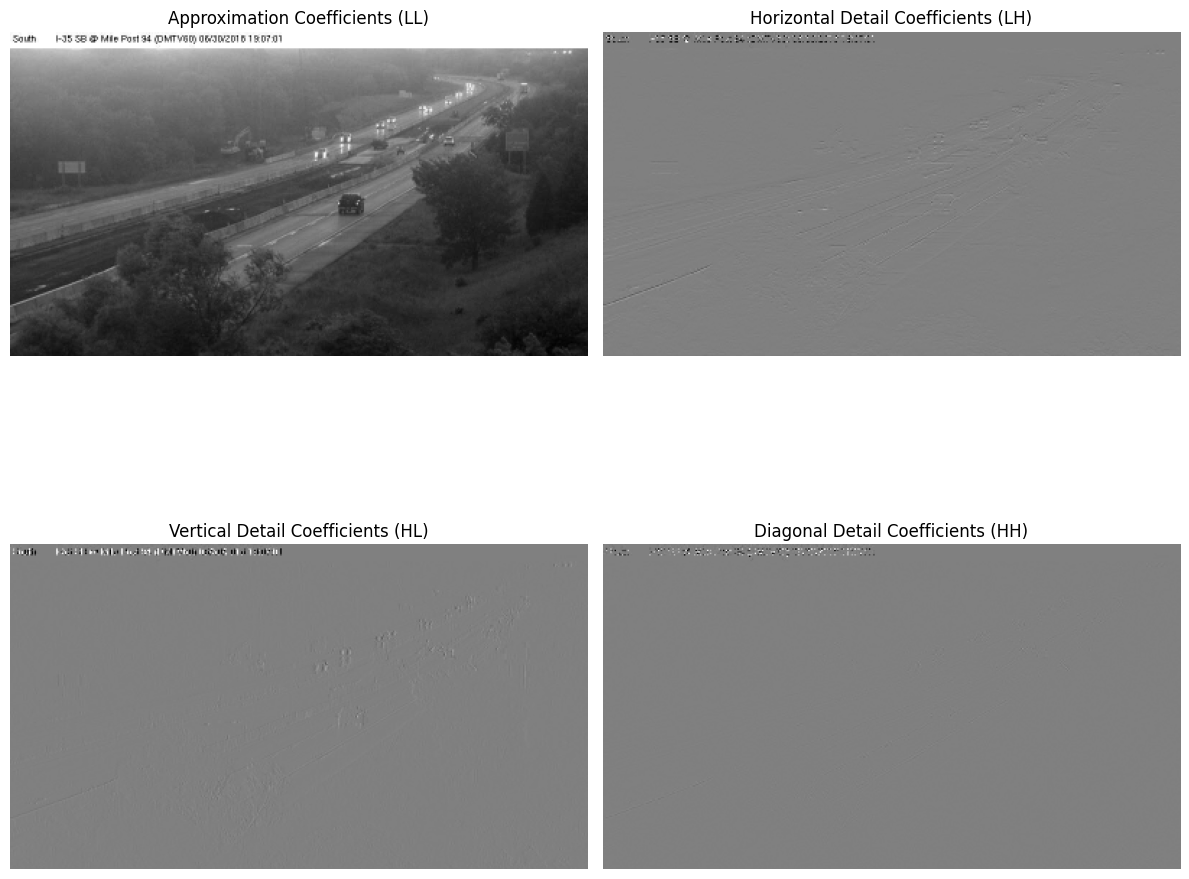

In [53]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Check the shape of the image array
print("Image array shape:", image_array.shape)

# If the image is color (3D array), convert it to grayscale
if len(image_array.shape) == 3 and image_array.shape[2] == 3:
    from skimage.color import rgb2gray
    image_array = rgb2gray(image_array)

# Ensure the image is 2D
if len(image_array.shape) != 2:
    raise ValueError("The image array should be 2D after preprocessing")

# Perform 2D Discrete Wavelet Transform using Haar wavelet
coeffs2 = pywt.dwt2(image_array, 'haar')

# Unpack the coefficients
LL, (LH, HL, HH) = coeffs2

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].imshow(LL, cmap='gray')
axes[0, 0].set_title('Approximation Coefficients (LL)')
axes[0, 0].axis('off')

axes[0, 1].imshow(LH, cmap='gray')
axes[0, 1].set_title('Horizontal Detail Coefficients (LH)')
axes[0, 1].axis('off')

axes[1, 0].imshow(HL, cmap='gray')
axes[1, 0].set_title('Vertical Detail Coefficients (HL)')
axes[1, 0].axis('off')

axes[1, 1].imshow(HH, cmap='gray')
axes[1, 1].set_title('Diagonal Detail Coefficients (HH)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

